##Support Vector Regression (SVR) to predict the Salary

Import Libraries

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

Load Data

In [ ]:
df = pd.read_csv("Salary Data.csv")
df.head(3)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0


Handling Missing Values

In [ ]:
df[df['Age'].isnull()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.drop(172,inplace=True)
df.drop(260,inplace=True)

In [ ]:
df['Job Title'].value_counts()

Job Title
Director of Marketing              12
Director of Operations             11
Senior Business Analyst            10
Senior Marketing Analyst            9
Senior Marketing Manager            9
                                   ..
Business Development Manager        1
Customer Service Representative     1
IT Manager                          1
Digital Marketing Manager           1
Junior Web Developer                1
Name: count, Length: 174, dtype: int64

Converting Data Types

In [ ]:
df['Age']=df['Age'].astype(int)
df['Years of Experience']=df['Years of Experience'].astype(int)
df['Salary']=df['Salary'].astype(int)
embarked_mapping = {"Bachelor's": 1, "Master's": 2, "PhD": 3}
df['Education Level'] = df['Education Level'].map(embarked_mapping)
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,1,Software Engineer,5,90000
1,28,Female,2,Data Analyst,3,65000
2,45,Male,3,Senior Manager,15,150000
3,36,Female,1,Sales Associate,7,60000
4,52,Male,2,Director,20,200000
...,...,...,...,...,...,...
370,35,Female,1,Senior Marketing Analyst,8,85000
371,43,Male,2,Director of Operations,19,170000
372,29,Female,1,Junior Project Manager,2,40000
373,34,Male,1,Senior Operations Coordinator,7,90000


Feature Selection and Data Splitting

In [ ]:
import matplotlib.pyplot as plt
X = df.iloc[:,[0,2,4]].values
y = df.iloc[:,5].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Training,Prediction,Evaluation and Visualization

Mean Squared Error: 2449864411.19


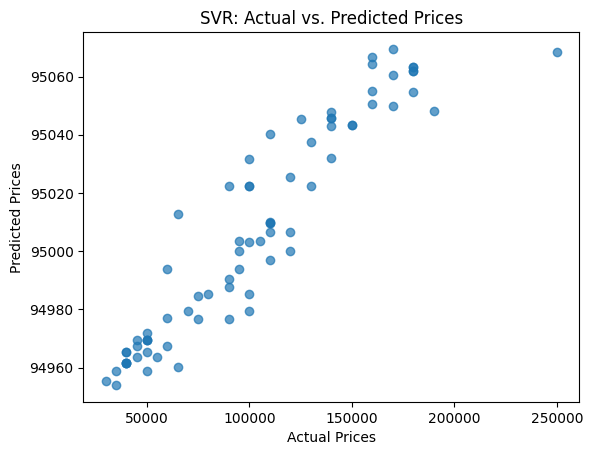

In [ ]:
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

svr_model.fit(X_train, y_train)

y_pred = svr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("SVR: Actual vs. Predicted Prices")
plt.show()